In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

import warnings
warnings.filterwarnings("ignore")


In [2]:
url = "https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv"
data = pd.read_csv(url)
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()
data['Class'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

,count
Class,
0,763
1,9


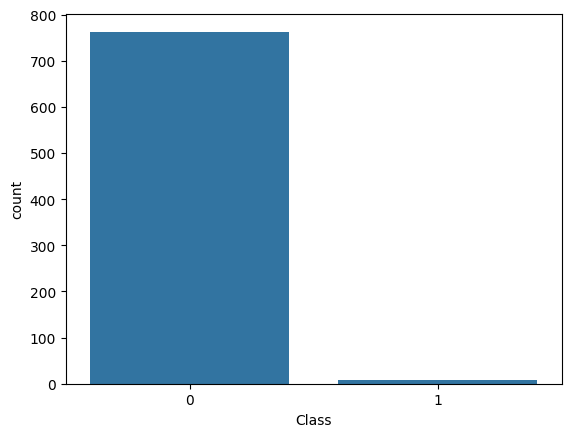

In [4]:
sns.countplot(x='Class', data=data)
plt.show()


In [5]:
X = data.drop('Class', axis=1)
y = data['Class']


In [6]:
samplers = {
    "Sampling1": RandomOverSampler(random_state=42),
    "Sampling2": SMOTE(random_state=42),
    "Sampling3": RandomUnderSampler(random_state=42),
    "Sampling4": SMOTEENN(random_state=42),
    "Sampling5": None
}


In [7]:
models = {
    "M1": LogisticRegression(),
    "M2": DecisionTreeClassifier(),
    "M3": RandomForestClassifier(),
    "M4": GaussianNB(),
    "M5": SVC()
}


In [8]:
results = []

for s_name, sampler in samplers.items():
    if sampler:
        X_res, y_res = sampler.fit_resample(X, y)
    else:
        X_res, y_res = X, y

    X_train, X_test, y_train, y_test = train_test_split(
        X_res, y_res, test_size=0.2, random_state=42
    )

    for m_name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        acc = accuracy_score(y_test, pred)
        results.append([m_name, s_name, round(acc*100, 2)])


In [9]:
result_df = pd.DataFrame(results, columns=["Model", "Sampling", "Accuracy"])
table = result_df.pivot(index="Model", columns="Sampling", values="Accuracy")
table


Sampling,Sampling1,Sampling2,Sampling3,Sampling4,Sampling5
Model,,,,,
M1,91.83,91.18,25.0,96.54,99.35
M2,99.35,98.04,75.0,100.00,97.42
M3,100.00,99.35,75.0,100.00,99.35
M4,75.82,83.99,25.0,92.64,98.06
M5,66.99,68.63,0.0,74.46,99.35


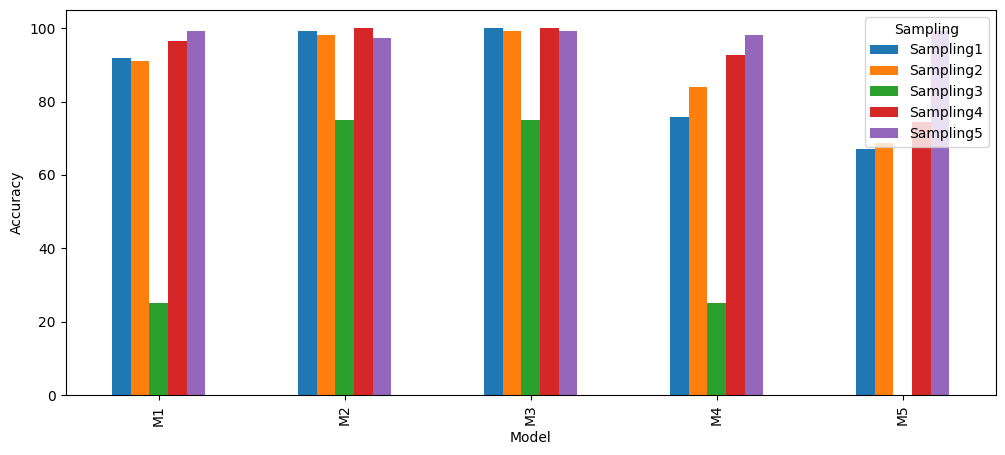

In [10]:
table.plot(kind='bar', figsize=(12,5))
plt.ylabel("Accuracy")
plt.show()


In [11]:
best_sampling = table.idxmax(axis=1)
best_accuracy = table.max(axis=1)

final_result = pd.DataFrame({
    "Best Sampling": best_sampling,
    "Accuracy": best_accuracy
})

final_result


,Best Sampling,Accuracy
Model,,
M1,Sampling5,99.35
M2,Sampling4,100.00
M3,Sampling1,100.00
M4,Sampling5,98.06
M5,Sampling5,99.35


In [12]:
print("Sampling improves performance on imbalanced data.")
print("SMOTE and SMOTEENN generally give higher accuracy.")
print("Tree-based models perform consistently well.")


Sampling improves performance on imbalanced data.
SMOTE and SMOTEENN generally give higher accuracy.
Tree-based models perform consistently well.
